<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 138.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 160.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 128.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 103.3 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here

# Check for missing values in the critical columns
missing_data = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()

print(missing_data)

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


In [4]:
# Check for missing values in percentage
missing_percentage = (missing_data / len(df)) * 100
print(missing_percentage)

Employment     0.000000
JobSat        55.490013
RemoteWork    16.246160
dtype: float64


In [5]:
# Drop rows with missing values in the critical columns
df_dropped = df.dropna(subset=['Employment', 'JobSat', 'RemoteWork'])

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [6]:
# Print all column names
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


In [7]:
# Display basic information and check for missing values
print(df[['YearsCodePro', 'JobSat']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearsCodePro  51610 non-null  object 
 1   JobSat        29126 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1022.6+ KB
None


In [8]:
# Drop rows where 'YearsCodePro' or 'JobSat' are missing
df = df.dropna(subset=['YearsCodePro', 'JobSat'])

In [9]:
## Write your code here
# Convert 'YearsCodePro' to numeric, coerce errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows where conversion failed
df = df.dropna(subset=['YearsCodePro'])

In [10]:
# Define bins and labels
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']

# Create a new column for experience ranges
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

In [11]:
# Group by experience range and calculate median JobSat
median_job_sat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()

# Display the results
print(median_job_sat)

  ExperienceRange  JobSat
0       0-5 years     7.0
1      5-10 years     7.0
2     10-20 years     7.0
3       >20 years     8.0


/tmp/ipykernel_160/3635505768.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()


/tmp/ipykernel_160/1487726304.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExperienceRange', y='JobSat', data=median_job_sat, palette='viridis')


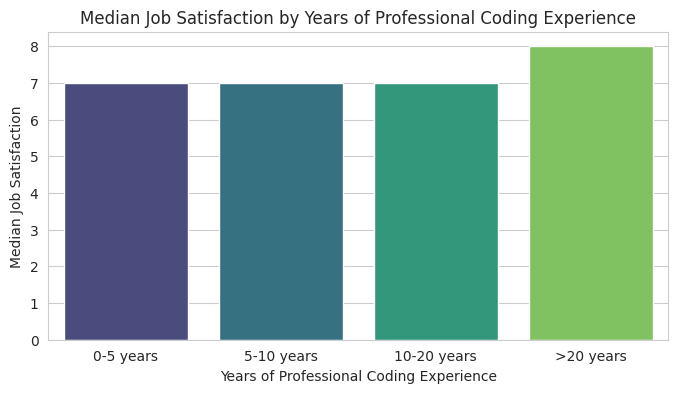

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='ExperienceRange', y='JobSat', data=median_job_sat, palette='viridis')

# Set plot labels and title
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


In [13]:
## Write your code here
# Drop rows with missing JobSat values
df = df.dropna(subset=['JobSat'])

# If JobSat is numeric but stored as a string, convert it to numeric
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Drop rows where conversion failed
df = df.dropna(subset=['JobSat'])

/tmp/ipykernel_160/621476275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='JobSat', data=df, palette='viridis')


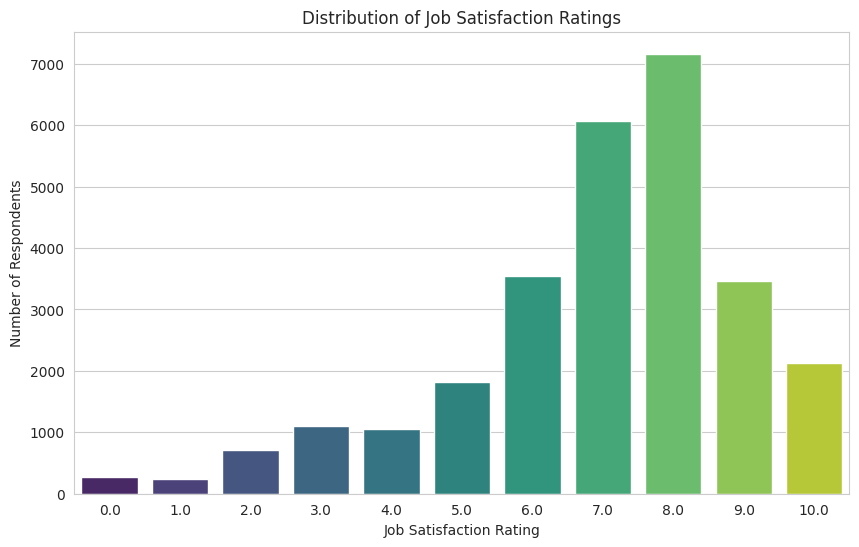

In [14]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='JobSat', data=df, palette='viridis')

# Set plot labels and title
plt.xlabel('Job Satisfaction Rating')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Job Satisfaction Ratings')

# Display the plot
plt.show()

/tmp/ipykernel_160/2358424514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='JobSat', data=df, palette='viridis')


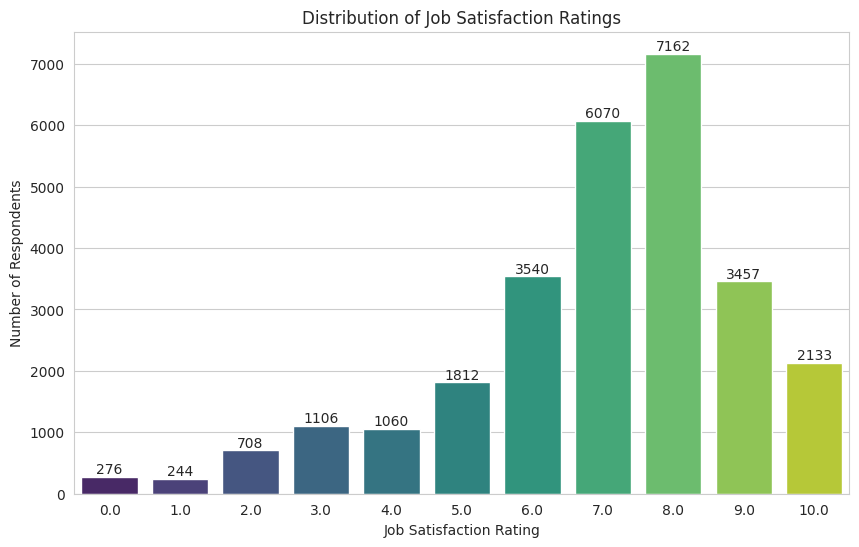

In [15]:
# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='JobSat', data=df, palette='viridis')

# Add annotations
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set plot labels and title
plt.xlabel('Job Satisfaction Rating')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Job Satisfaction Ratings')

# Display the plot
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


In [16]:
## Write your code here

# Drop rows where 'RemoteWork' or 'Employment' are missing
df = df.dropna(subset=['RemoteWork', 'Employment'])

In [17]:
# Convert text to lowercase for consistency
df['RemoteWork'] = df['RemoteWork'].str.lower()
df['Employment'] = df['Employment'].str.lower()

/tmp/ipykernel_160/3612271947.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='RemoteWork', data=df, palette='viridis')


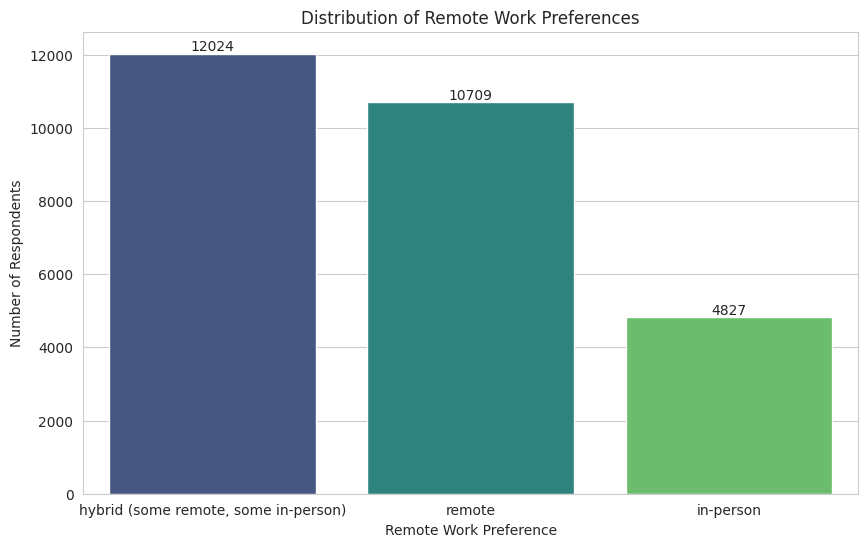

In [18]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='RemoteWork', data=df, palette='viridis')

# Add annotations
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set plot labels and title
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Remote Work Preferences')

# Display the plot
plt.show()

In [19]:
# Assuming 'df' is your DataFrame
crosstab = pd.crosstab(df['Employment'], df['RemoteWork'], margins=True)

# Display the crosstab
print(crosstab)

RemoteWork                                          hybrid (some remote, some in-person)  \
Employment                                                                                 
employed, full-time                                                                 9589   
employed, full-time;employed, part-time                                               47   
employed, full-time;independent contractor, fre...                                   797   
employed, full-time;independent contractor, fre...                                    52   
employed, full-time;independent contractor, fre...                                     0   
employed, full-time;independent contractor, fre...                                    41   
employed, full-time;independent contractor, fre...                                     3   
employed, full-time;not employed, and not looki...                                     0   
employed, full-time;not employed, but looking f...                              

In [20]:
# Normalize the crosstab by dividing by the grand total
crosstab_normalized = crosstab.div(crosstab.loc['All', 'All'])

# Display the normalized crosstab
print(crosstab_normalized)

RemoteWork                                          hybrid (some remote, some in-person)  \
Employment                                                                                 
employed, full-time                                                             0.347932   
employed, full-time;employed, part-time                                         0.001705   
employed, full-time;independent contractor, fre...                              0.028919   
employed, full-time;independent contractor, fre...                              0.001887   
employed, full-time;independent contractor, fre...                              0.000000   
employed, full-time;independent contractor, fre...                              0.001488   
employed, full-time;independent contractor, fre...                              0.000109   
employed, full-time;not employed, and not looki...                              0.000000   
employed, full-time;not employed, but looking f...                              

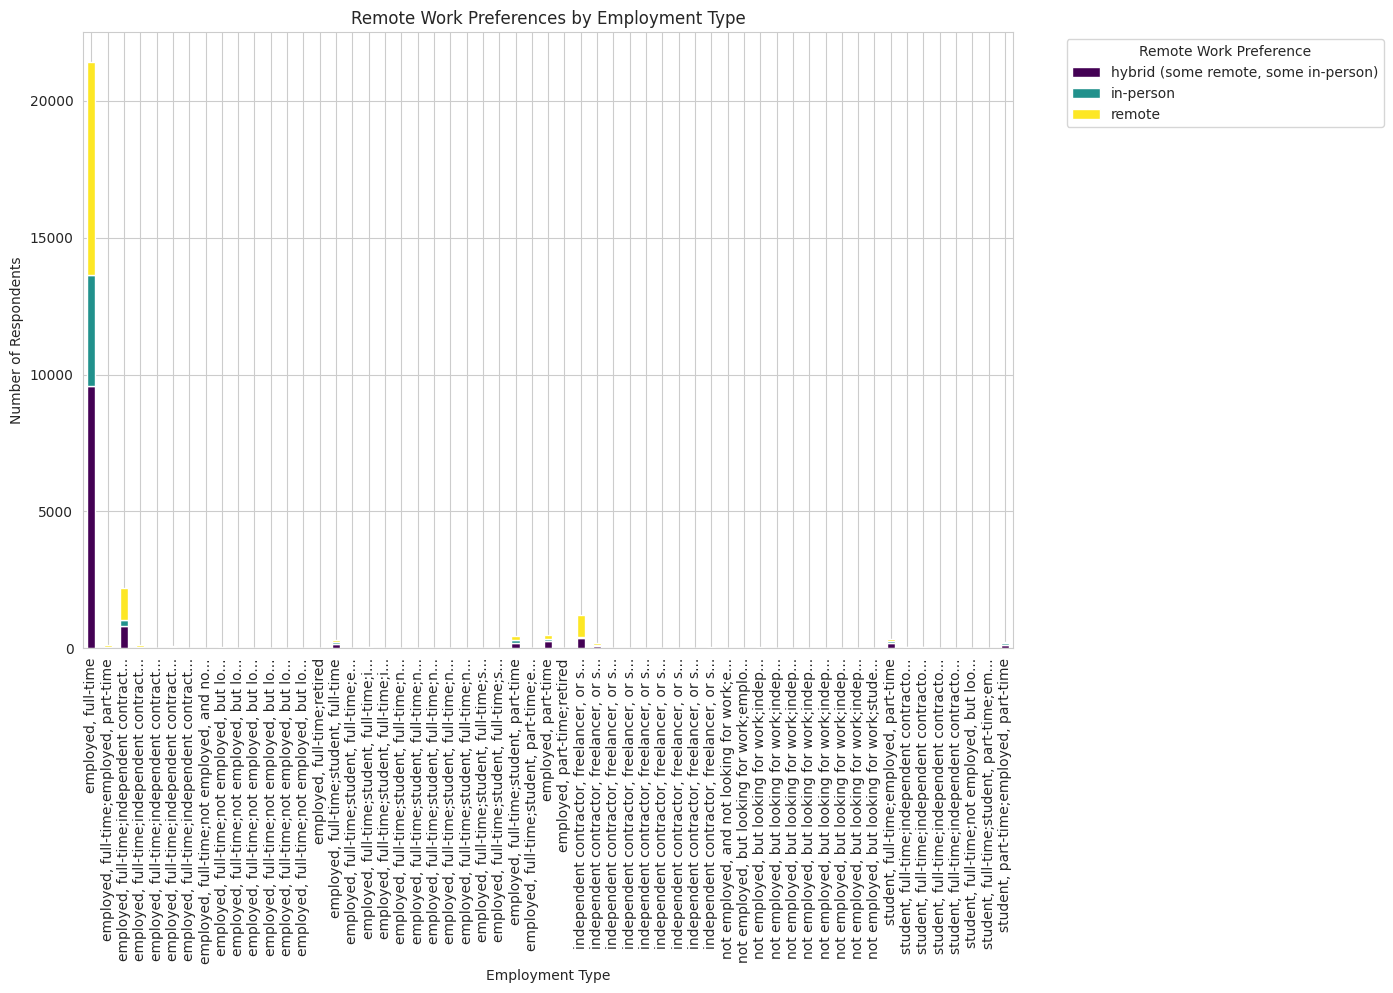

In [21]:
import matplotlib.pyplot as plt

# Remove the 'All' row and column for visualization
crosstab_visual = crosstab.drop('All', axis=0).drop('All', axis=1)

# Plot the crosstab
ax = crosstab_visual.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Define a function to shorten the labels
def shorten_labels(labels, max_length=40):
    return [label if len(label) <= max_length else label[:max_length] + '...' for label in labels]

# Apply shortened labels to x-tick labels
ax.set_xticklabels(shorten_labels(crosstab_visual.index, max_length=40))

# Set plot labels and title
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.title('Remote Work Preferences by Employment Type')

# Apply shortened labels to legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, shorten_labels(labels, max_length=40), title='Remote Work Preference', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [22]:
## Write your code here

# Display the first few rows of relevant columns
print(df[['Country', 'LanguageHaveWorkedWith']].head())

                     Country  \
12  United States of America   
15               Switzerland   
18                   Germany   
22                   Ireland   
24                     Italy   

                               LanguageHaveWorkedWith  
12  Bash/Shell (all shells);C#;JavaScript;PowerShe...  
15  C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScri...  
18              C#;HTML/CSS;JavaScript;PHP;Python;SQL  
22  Bash/Shell (all shells);C#;F#;JavaScript;Power...  
24                        Clojure;Java;JavaScript;SQL  


In [23]:
# Drop rows with missing values in 'Country' or 'LanguageHaveWorkedWith'
df = df.dropna(subset=['Country', 'LanguageHaveWorkedWith'])

In [24]:
# Convert 'Country' names to a consistent format (e.g., title case)
df['Country'] = df['Country'].str.title()

# Split 'LanguageHaveWorkedWith' into a list of languages
df['LanguagesWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')

In [25]:
# mapping countries to region
country_to_region = {
    'United States': 'North America',
    'Canada': 'North America',
    'Germany': 'Europe',
    'France': 'Europe',
    # Add more mappings as needed
}

# Map countries to regions
df['Region'] = df['Country'].map(country_to_region)

In [26]:
# Explode the 'LanguagesWorkedWith' list to create a row for each language
df_exploded = df.explode('LanguagesWorkedWith')

In [27]:
# Group by 'Region' and 'LanguagesWorkedWith' and count occurrences
language_counts = df_exploded.groupby(['Region', 'LanguagesWorkedWith']).size().reset_index(name='Count')
print(language_counts)

           Region      LanguagesWorkedWith  Count
0          Europe                      Ada     23
1          Europe                     Apex     12
2          Europe                 Assembly    171
3          Europe  Bash/Shell (all shells)   1457
4          Europe                        C    680
..            ...                      ...    ...
92  North America               TypeScript    412
93  North America                      VBA     37
94  North America      Visual Basic (.Net)     51
95  North America                   Zephyr      3
96  North America                      Zig      4

[97 rows x 3 columns]


In [28]:
# Sort values to get the top languages per region
top_languages = language_counts.sort_values(['Region', 'Count'], ascending=[True, False])
print(top_languages)

           Region LanguagesWorkedWith  Count
22         Europe          JavaScript   1936
19         Europe            HTML/CSS   1732
36         Europe              Python   1729
40         Europe                 SQL   1686
44         Europe          TypeScript   1459
..            ...                 ...    ...
96  North America                 Zig      4
95  North America              Zephyr      3
49  North America                 Ada      2
57  North America               Cobol      2
78  North America                 Nim      2

[97 rows x 3 columns]


/tmp/ipykernel_160/2254161551.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


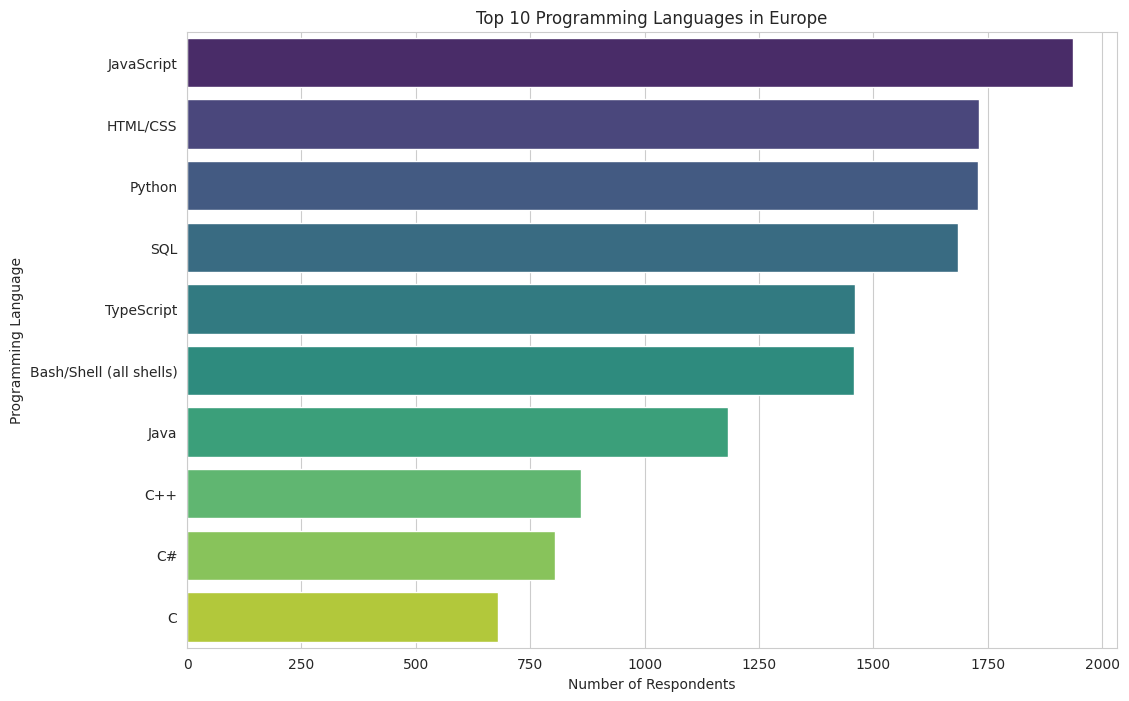

In [29]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot top languages for a specific region (e.g., 'Europe')
region = 'Europe'
top_n = 10  # Number of top languages to display

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_languages[top_languages['Region'] == region].head(top_n),
    x='Count', y='LanguagesWorkedWith', palette='viridis'
)

# Set plot labels and title
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.title(f'Top {top_n} Programming Languages in {region}')

# Display the plot
plt.show()

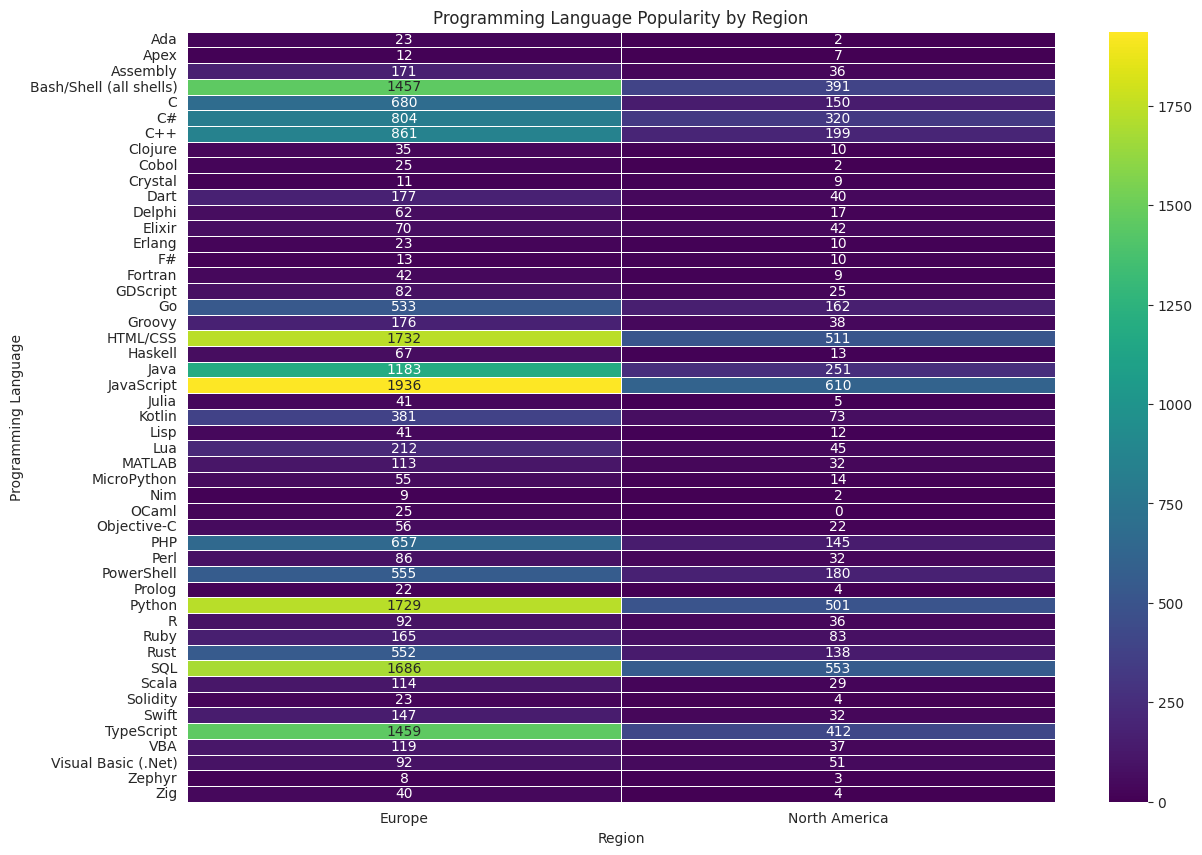

In [30]:
# Pivot the data for heatmap visualization

heatmap_data = language_counts.pivot(index='LanguagesWorkedWith', columns='Region', values='Count').fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='viridis', linewidths=0.5, annot=True, fmt='g')

# Set plot labels and title
plt.xlabel('Region')
plt.ylabel('Programming Language')
plt.title('Programming Language Popularity by Region')

# Display the plot
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [31]:
## Write your code here

# Drop rows with missing values in 'YearsCodePro' or 'JobSatPoints_1'
df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

In [32]:
# Convert 'YearsCodePro' to numeric, forcing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows where conversion failed
df = df.dropna(subset=['YearsCodePro'])

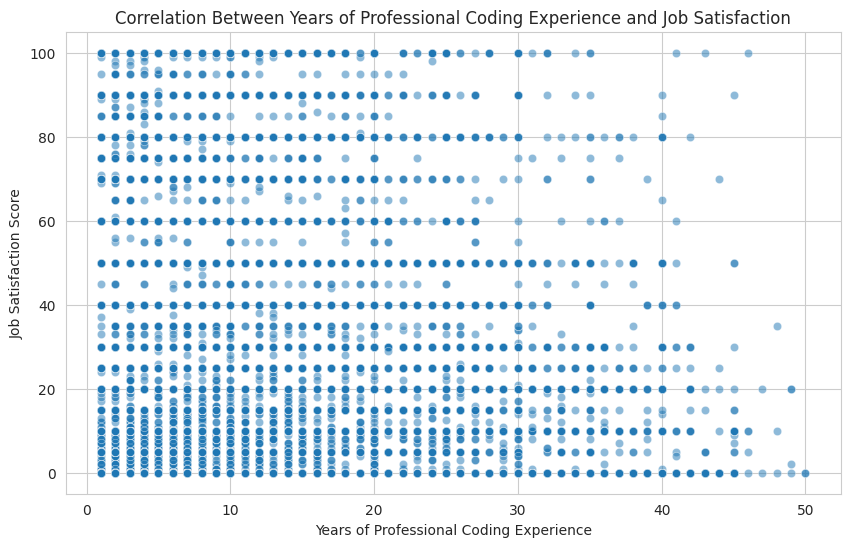

In [33]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(df['YearsCodePro'], df['JobSatPoints_1'], alpha=0.5, edgecolors='w', linewidth=0.5)

# Add titles and labels
plt.title('Correlation Between Years of Professional Coding Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')

# Display the plot
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [34]:
## Write your code here

# Display the first few rows to understand the structure
print(df[['EdLevel', 'Employment']].head())

                                              EdLevel  \
12       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
15  Some college/university study without earning ...   
18  Some college/university study without earning ...   
22       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
24       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                Employment  
12                     employed, full-time  
15                     employed, full-time  
18                     employed, full-time  
22                     employed, full-time  
24  employed, full-time;student, part-time  


In [35]:
# Drop rows with missing values in 'EdLevel' or 'Employment'
df = df.dropna(subset=['EdLevel', 'Employment'])

In [36]:
# Strip leading/trailing whitespace and convert to title case for consistency
df['EdLevel'] = df['EdLevel'].str.strip().str.title()
df['Employment'] = df['Employment'].str.strip().str.title()

In [37]:
# Generate a cross-tabulation of 'EdLevel' and 'Employment'
crosstab = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index') * 100

# Display the cross-tabulation table
print(crosstab)

Employment                                          Employed, Full-Time  \
EdLevel                                                                   
Associate Degree (A.A., A.S., Etc.)                           76.115802   
Bachelor’S Degree (B.A., B.S., B.Eng., Etc.)                  80.237537   
Master’S Degree (M.A., M.S., M.Eng., Mba, Etc.)               79.722573   
Primary/Elementary School                                     68.852459   
Professional Degree (Jd, Md, Ph.D, Ed.D, Etc.)                82.245827   
Secondary School (E.G. American High School, Ge...            60.889224   
Some College/University Study Without Earning A...            69.245648   
Something Else                                                73.764259   

Employment                                          Employed, Full-Time;Employed, Part-Time  \
EdLevel                                                                                       
Associate Degree (A.A., A.S., Etc.)                        

/tmp/ipykernel_160/2697058618.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


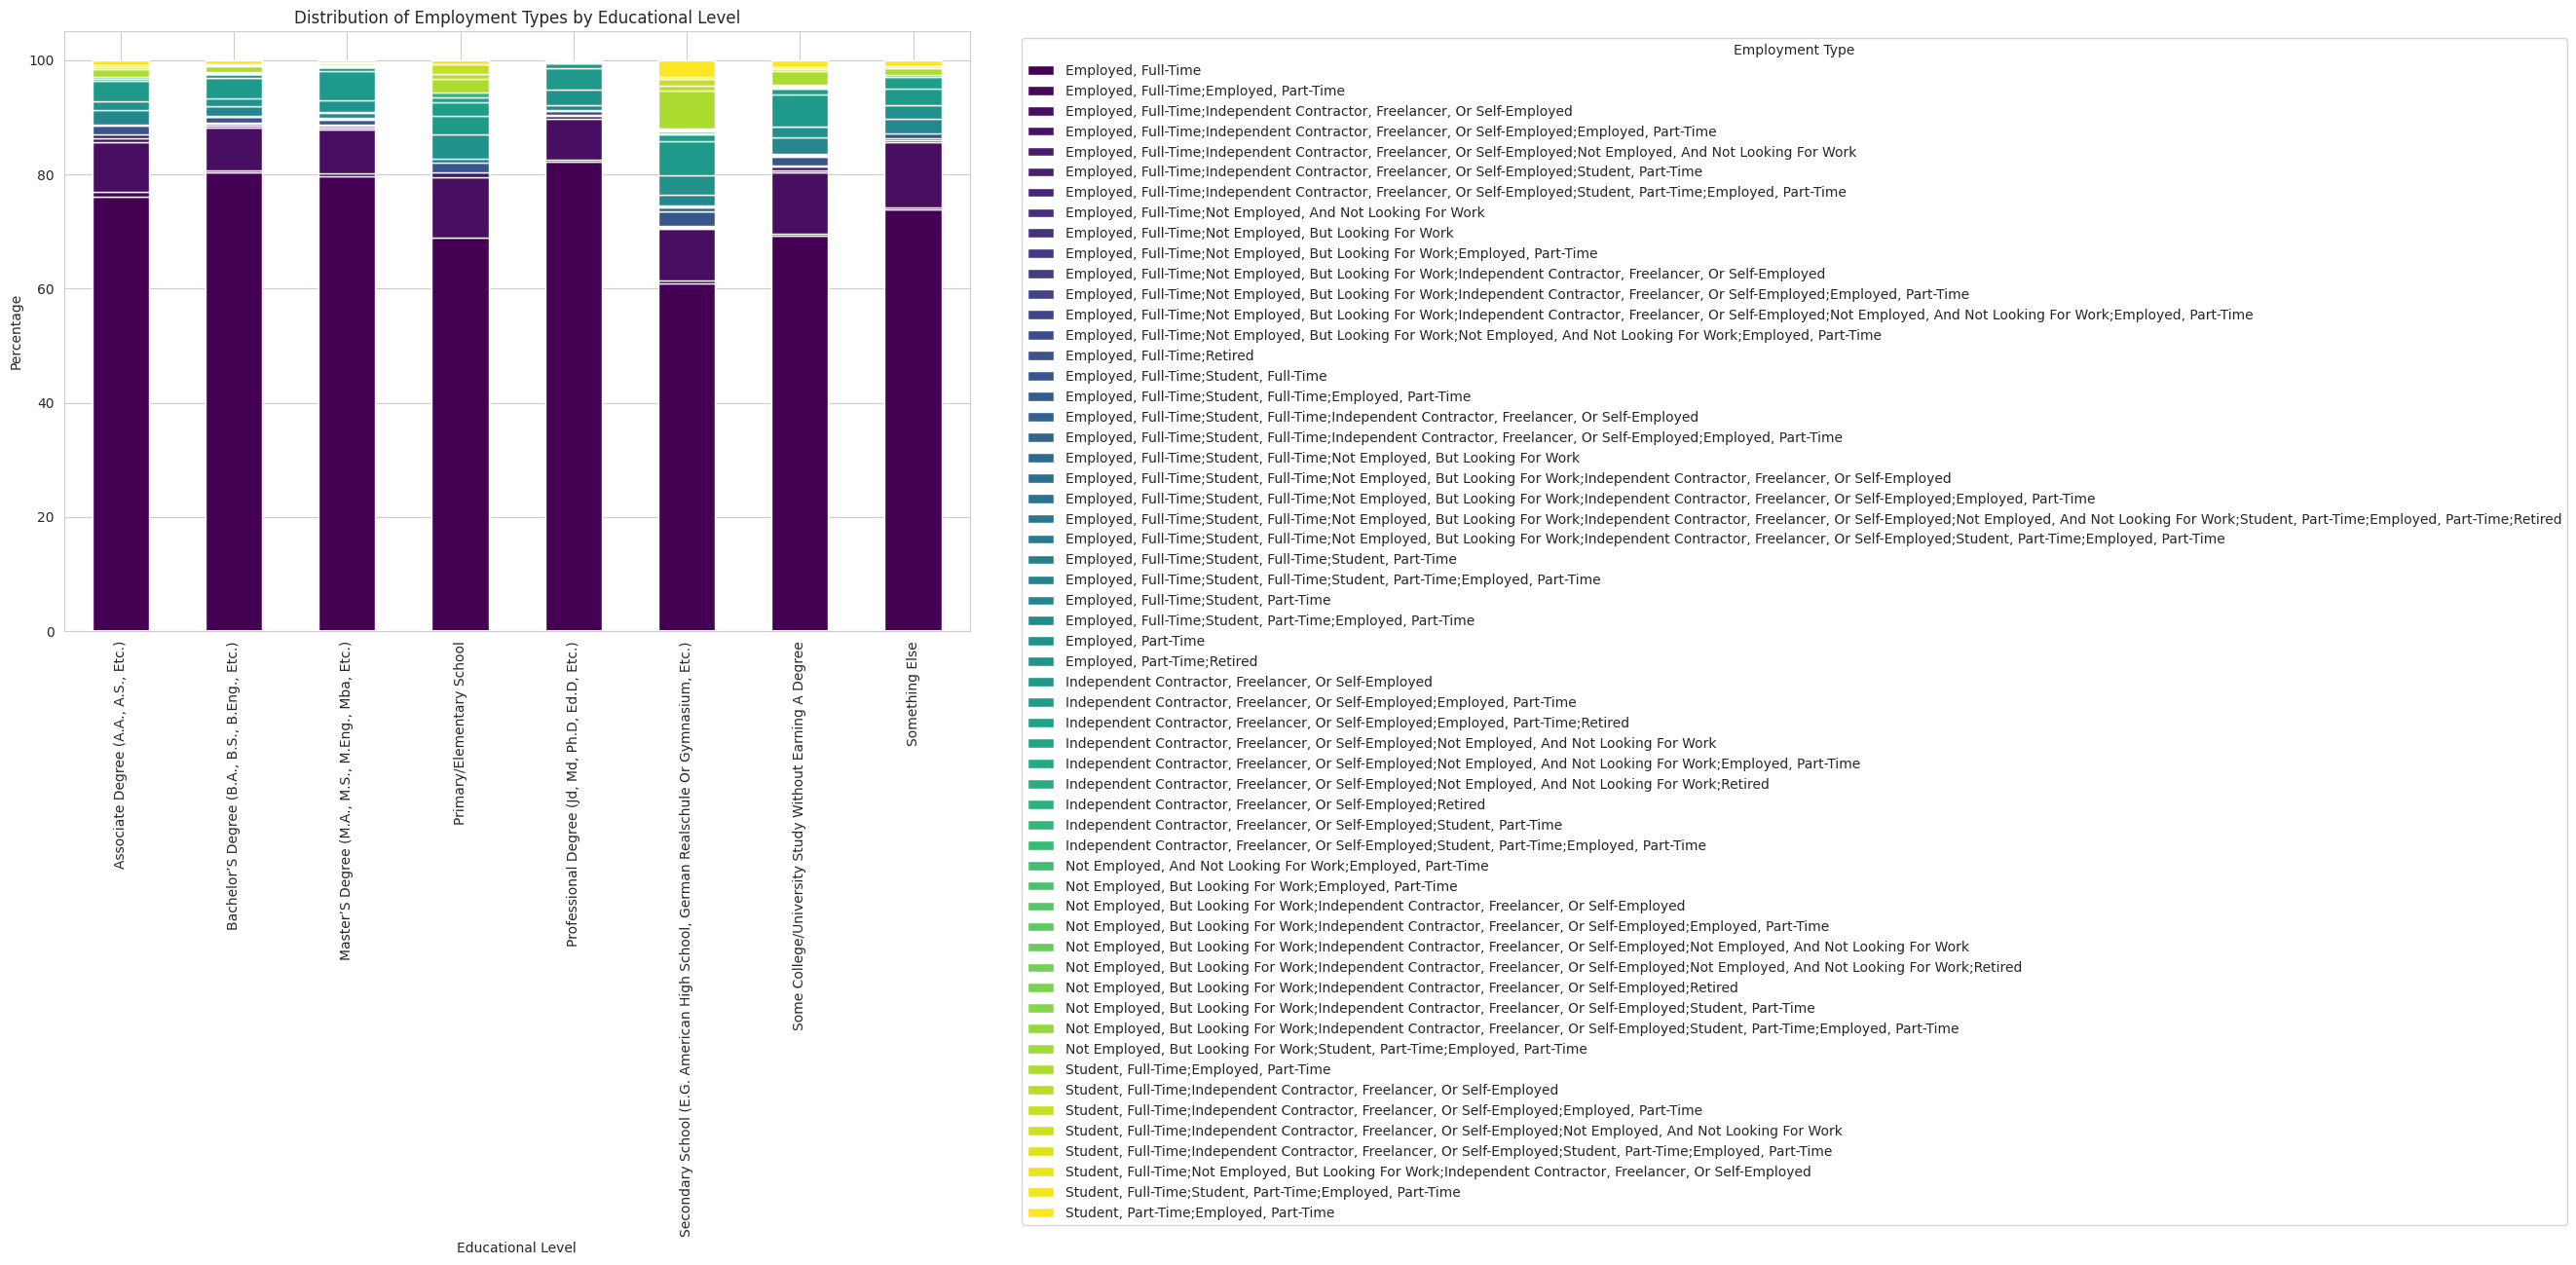

In [38]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a stacked bar plot
crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Set plot labels and title
plt.xlabel('Educational Level')
plt.ylabel('Percentage')
plt.title('Distribution of Employment Types by Educational Level')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [46]:
## Write your code here

#Saving modified DataFrame
df.to_csv('survey_data.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
